In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
metadata = pd.read_csv("../data/ptbxl_database.csv", dtype={'patient_id': int}, index_col='ecg_id')
metadata

,patient_id,age,sex,height,weight,nurse,site,device,recording_date,report,...,validated_by_human,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr
ecg_id,,,,,,,,,,,,,,,,,,,,,
1,15709,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,sinusrhythmus periphere niederspannung,...,True,NaN,", I-V1,",NaN,NaN,NaN,NaN,3,records100/00000/00001_lr,records500/00000/00001_hr
2,13243,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-11-14 12:55:37,sinusbradykardie sonst normales ekg,...,True,NaN,NaN,NaN,NaN,NaN,NaN,2,records100/00000/00002_lr,records500/00000/00002_hr
3,20372,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,sinusrhythmus normales ekg,...,True,NaN,NaN,NaN,NaN,NaN,NaN,5,records100/00000/00003_lr,records500/00000/00003_hr
4,17014,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1984-11-15 13:44:57,sinusrhythmus normales ekg,...,True,", II,III,AVF",NaN,NaN,NaN,NaN,NaN,3,records100/00000/00004_lr,records500/00000/00004_hr
5,17448,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1984-11-17 10:43:15,sinusrhythmus normales ekg,...,True,", III,AVR,AVF",NaN,NaN,NaN,NaN,NaN,4,records100/00000/00005_lr,records500/00000/00005_hr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21833,17180,67.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-05-31 09:14:35,ventrikulÄre extrasystole(n) sinustachykardie ...,...,True,NaN,", alles,",NaN,NaN,1ES,NaN,7,records100/21000/21833_lr,records500/21000/21833_hr
21834,20703,300.0,0,NaN,NaN,1.0,2.0,AT-60 3,2001-06-05 11:33:39,sinusrhythmus lagetyp normal qrs(t) abnorm ...,...,True,NaN,NaN,NaN,NaN,NaN,NaN,4,records100/21000/21834_lr,records500/21000/21834_hr
21835,19311,59.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-06-08 10:30:27,sinusrhythmus lagetyp normal t abnorm in anter...,...,True,NaN,", I-AVR,",NaN,NaN,NaN,NaN,2,records100/21000/21835_lr,records500/21000/21835_hr


In [8]:
metadata.loc[1]

patient_id                                                         15709
age                                                                 56.0
sex                                                                    1
height                                                               NaN
weight                                                              63.0
nurse                                                                2.0
site                                                                 0.0
device                                                         CS-12   E
recording_date                                       1984-11-09 09:17:34
report                            sinusrhythmus periphere niederspannung
scp_codes                       {'NORM': 100.0, 'LVOLT': 0.0, 'SR': 0.0}
heart_axis                                                           NaN
infarction_stadium1                                                  NaN
infarction_stadium2                                

In [17]:
SAMPLE_IDX = 15555

def ecg_id_to_path(ecg_id: int):
    pid = metadata.loc[ecg_id]['patient_id']
    path = f"../cache/singlecycle_data/{pid:05d}/{ecg_id:05d}"

    return f"{path}/cycle_00.parquet"

sample_cycle = pd.read_parquet(ecg_id_to_path(SAMPLE_IDX))

sample_cycle

,I,II,III,aVR,aVL,aVF,V1,V2,V3,V4,V5,V6
0,-0.056947,-0.028232,0.028712,0.042177,-0.042827,-0.000053,-0.023547,-0.120948,-0.137472,-0.106731,-0.056252,-0.028582
1,-0.057671,-0.028437,0.029232,0.042677,-0.043474,0.000124,-0.024005,-0.122553,-0.139172,-0.108743,-0.056821,-0.028518
2,-0.058345,-0.028591,0.029751,0.043137,-0.044091,0.000332,-0.024514,-0.124336,-0.140890,-0.110595,-0.057410,-0.028474
3,-0.058949,-0.028696,0.030250,0.043556,-0.044658,0.000569,-0.025052,-0.126199,-0.142648,-0.112246,-0.057960,-0.028480
4,-0.059403,-0.028750,0.030650,0.043876,-0.045094,0.000776,-0.025539,-0.128061,-0.144404,-0.113696,-0.058509,-0.028536
...,...,...,...,...,...,...,...,...,...,...,...,...
495,-0.008418,-0.005297,0.003138,0.006722,-0.005579,-0.001058,0.012041,-0.051008,-0.036222,0.002943,0.025762,0.031284
496,-0.007024,-0.004646,0.002375,0.005690,-0.004471,-0.001094,0.013200,-0.048837,-0.035006,0.004107,0.024722,0.029838
497,-0.005480,-0.003875,0.001602,0.004527,-0.003303,-0.001090,0.014379,-0.046686,-0.033791,0.005262,0.023632,0.028392
498,-0.003917,-0.003035,0.000880,0.003325,-0.002165,-0.001025,0.015548,-0.044545,-0.032616,0.006466,0.022521,0.026946


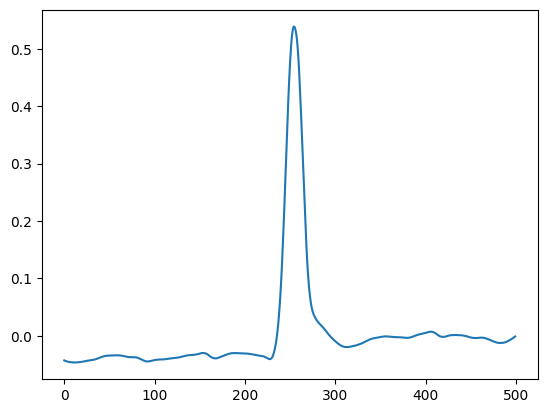

In [18]:
plt.plot(range(0, 500), sample_cycle['aVL'])